## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

sns.set(color_codes=True)
warnings.filterwarnings("ignore") 

## 1. Introduction

* Problem statement

    A FMCG company has entered into the instant noodles business two years back. Their higher management has notices that there is a miss match in the demand and supply. Where the demand is high, supply is pretty low and where the demand is low, supply is pretty high. In both the ways it is an inventory cost loss to the company. Hence, the higher management wants to optimize the supply quantity in each and every warehouse in entire country.
    

* Need of the study

    Due to the miss match in the demand and supply the company is suffering a loss in the inventory cost and the company would want to solve this. This can be solved by performing a good analysis and then build a model using historical data provided that will determine an optimum weight of the product to be shipped each time to the warehouse so that there would be no loss in inventory costs or operational costs and also there is no mismatch between demand and supply.

    And also, to analysis the demand pattern in different pockets of the country so management can drive the advertisement campaign particular in those pockets so that the company gets value based on this analysis.


## 2. EDA and Business Implication

In [2]:
path = "Data.csv"
df = pd.read_csv(path)
df.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,1,112,25.0,2009.0,18,0,C,6,24,24071


In [3]:
print(f"The number of rows in the data set are {df.shape[0]}")
print(f"The number of columns in the data set are {df.shape[1]}")

The number of rows in the data set are 25000
The number of columns in the data set are 24


In [4]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ware_house_ID,25000,25000,WH_100000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WH_Manager_ID,25000,25000,EID_50000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location_type,25000,2,Rural,22957,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WH_capacity_size,25000,3,Large,10169,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zone,25000,4,North,10278,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WH_regional_zone,25000,6,Zone 6,8339,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num_refill_req_l3m,25000.0,NaN,NaN,NaN,4.08904,2.606612,0.0,2.0,4.0,6.0,8.0
transport_issue_l1y,25000.0,NaN,NaN,NaN,0.77368,1.199449,0.0,0.0,0.0,1.0,5.0
Competitor_in_mkt,25000.0,NaN,NaN,NaN,3.1042,1.141663,0.0,2.0,3.0,4.0,12.0
retail_shop_num,25000.0,NaN,NaN,NaN,4985.71156,1052.825252,1821.0,4313.0,4859.0,5500.0,11008.0


* The column product_wg_ton has a mean value of 22102.63 and a median value of 22101. The mean and median values are almost equal which suggests normal distribution. The min and max values are 2065 and 55151 respectively.
* The column dist_from_hub has a mean value of 163.53 and median value of 164. The min and max values are 55 and 271 respectively.
* The columns Ware_house_ID and WH_Manager_ID seems to be the unique identifiers.
* The other descriptive statistics of the columns can be observed from the above table

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

* The columns Ware_house_ID, WH_Manager_ID, Location_Type, WH_capacity_size, zone, WH_regional_zone, wh_owner_type, approved_wh_govt_certificate is of object datatype and all the remaining columns are of numeric datatype.
* workers_num, wh_est_year,  approved_wh_govt_certificate have null values.
* Renaming of variables is not required

### Univariate Analysis

The are some columns which are categorical in nature but are of integer type. Hence converting them into string type for further analysis.

In [6]:
conv_cols = ['flood_impacted','flood_proof','electric_supply','temp_reg_mach']
df[conv_cols] = df[conv_cols].astype(str)

In [7]:
num_cols = df.describe().columns.tolist()
num_cols

['num_refill_req_l3m',
 'transport_issue_l1y',
 'Competitor_in_mkt',
 'retail_shop_num',
 'distributor_num',
 'dist_from_hub',
 'workers_num',
 'wh_est_year',
 'storage_issue_reported_l3m',
 'wh_breakdown_l3m',
 'govt_check_l3m',
 'product_wg_ton']

In [8]:
num_cols.remove('wh_est_year')

### Continuos variables

#### Columns - num_refill_req_l3m, transport_issue_l1y, Competitor_in_mkt, retail_shop_num, distributor_num, dist_from_hub

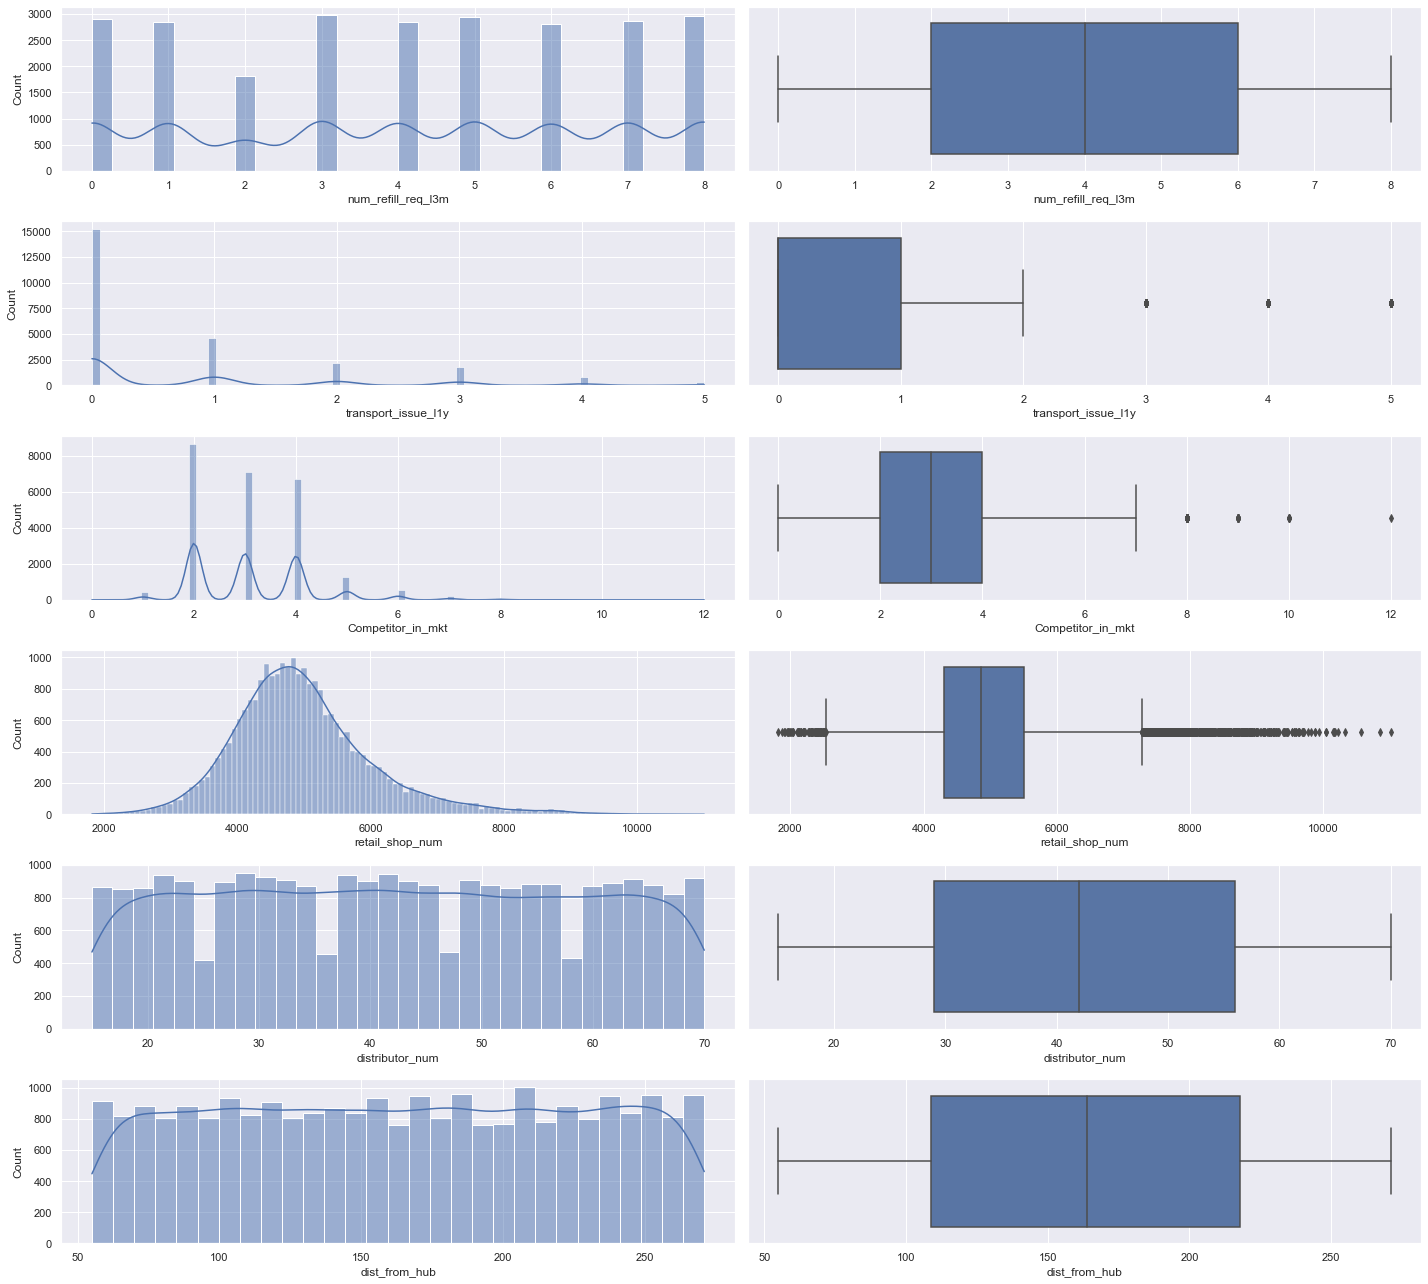

In [9]:
fig, axes = plt.subplots(nrows=6,ncols=2, figsize = (20,18))
for index in range(len(num_cols[:6])):
    sns.histplot(df[num_cols[index]], kde=True, ax=axes[index][0])
    sns.boxplot(x=num_cols[index], data=df, ax=axes[index][1])
plt.tight_layout()
plt.show()

#### Columns - workers_num, storage_issue_reported_l3m, wh_breakdown_l3m, govt_check_l3m, product_wg_ton

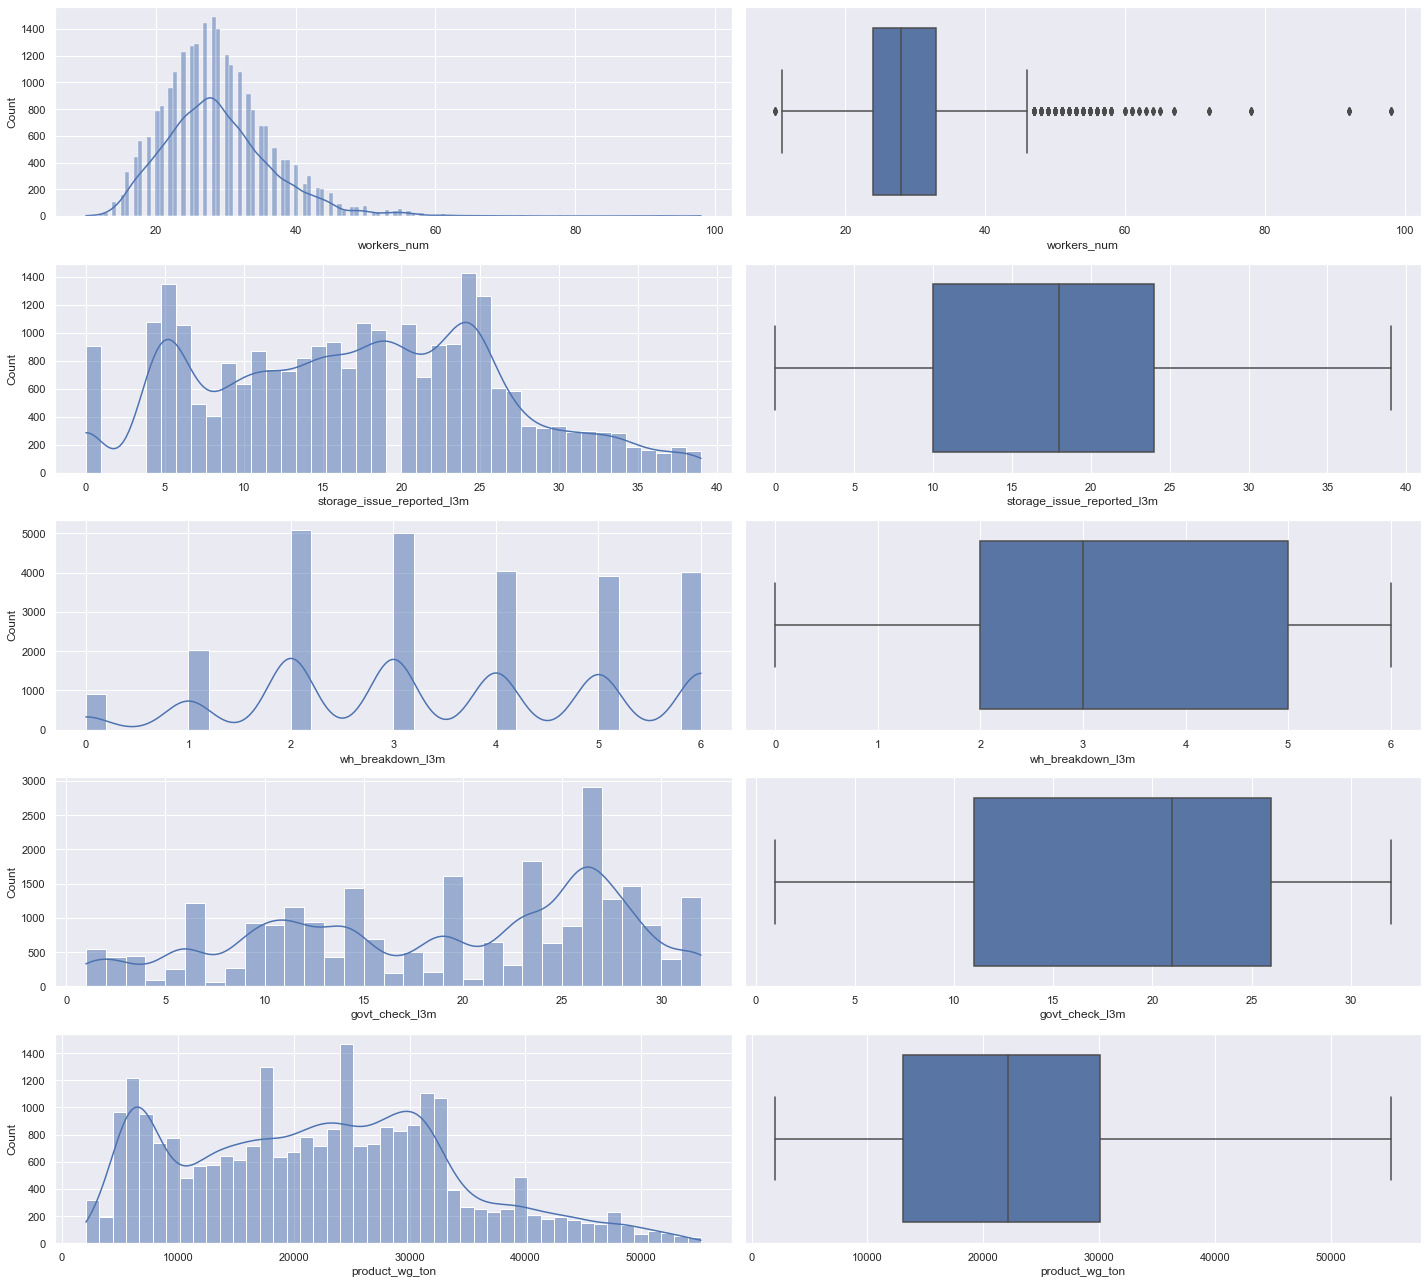

In [10]:
fig, axes = plt.subplots(nrows=5,ncols=2, figsize = (20,18))
for index in range(len(num_cols[6:])):
    sns.histplot(df[num_cols[6+index]], kde=True, ax=axes[index][0])
    sns.boxplot(x=num_cols[6+index], data=df, ax=axes[index][1])
plt.tight_layout()
plt.show()

### Categorical Variables

In [11]:
obj_cols = df.select_dtypes(include=['object', 'bool']).columns.tolist()
obj_cols

['Ware_house_ID',
 'WH_Manager_ID',
 'Location_type',
 'WH_capacity_size',
 'zone',
 'WH_regional_zone',
 'wh_owner_type',
 'flood_impacted',
 'flood_proof',
 'electric_supply',
 'temp_reg_mach',
 'approved_wh_govt_certificate']

In [12]:
obj_cols.remove('Ware_house_ID')
obj_cols.remove('WH_Manager_ID')

The unique categories present in the column Location_type are Rural, Urban and their counts are as follows - 


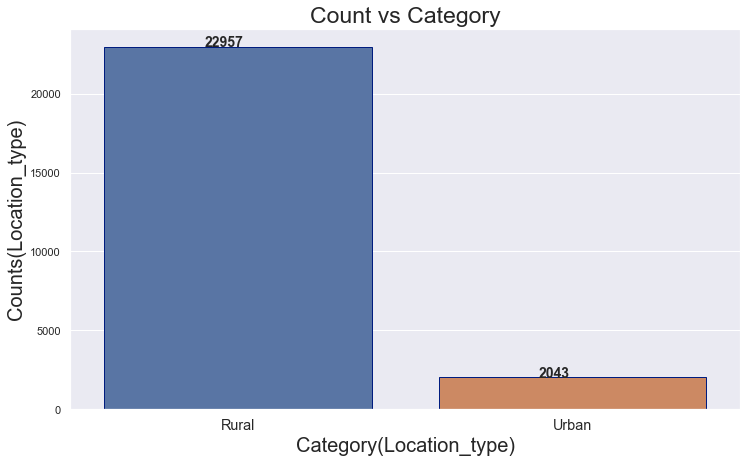



The unique categories present in the column WH_capacity_size are Large, Mid, Small and their counts are as follows - 


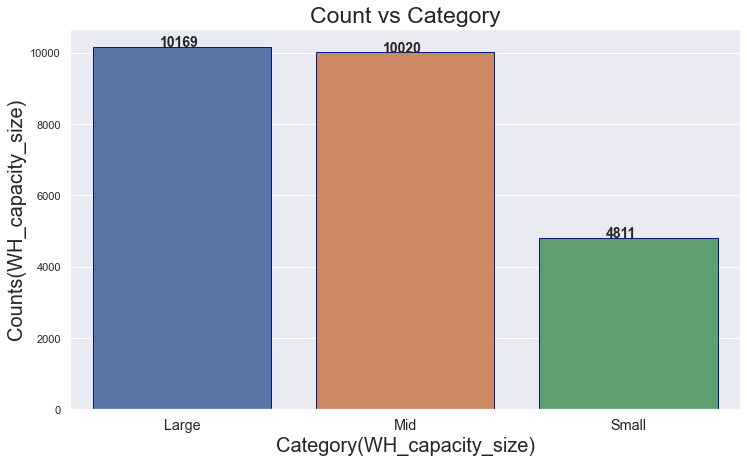



The unique categories present in the column zone are North, West, South, East and their counts are as follows - 


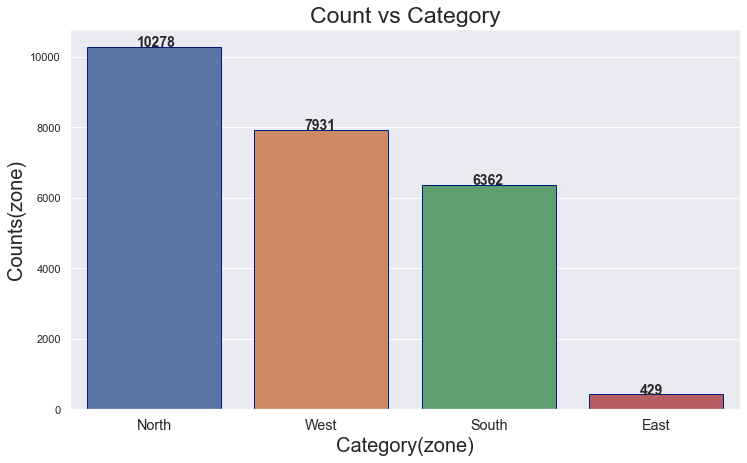



The unique categories present in the column WH_regional_zone are Zone 6, Zone 5, Zone 4, Zone 2, Zone 3, Zone 1 and their counts are as follows - 


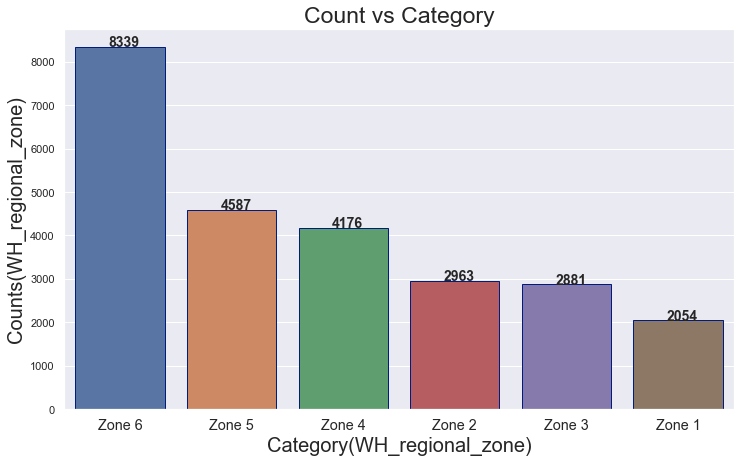



The unique categories present in the column wh_owner_type are Company Owned, Rented and their counts are as follows - 


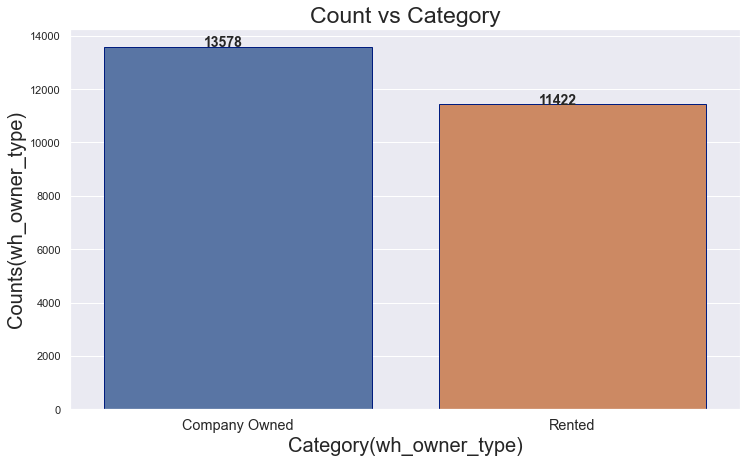



The unique categories present in the column flood_impacted are 0, 1 and their counts are as follows - 


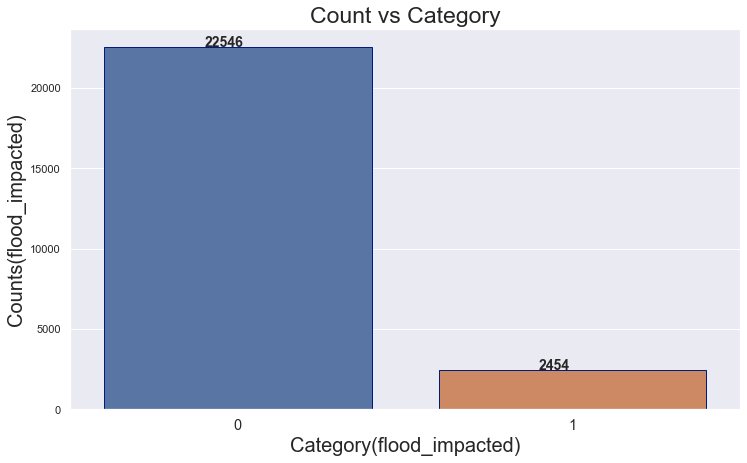



The unique categories present in the column flood_proof are 0, 1 and their counts are as follows - 


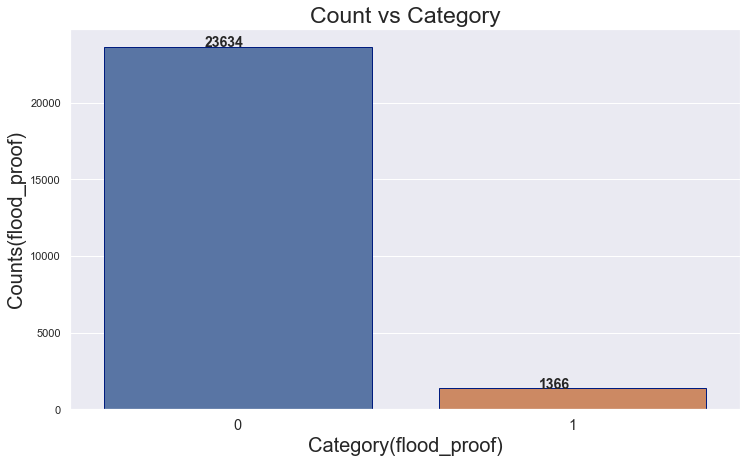



The unique categories present in the column electric_supply are 1, 0 and their counts are as follows - 


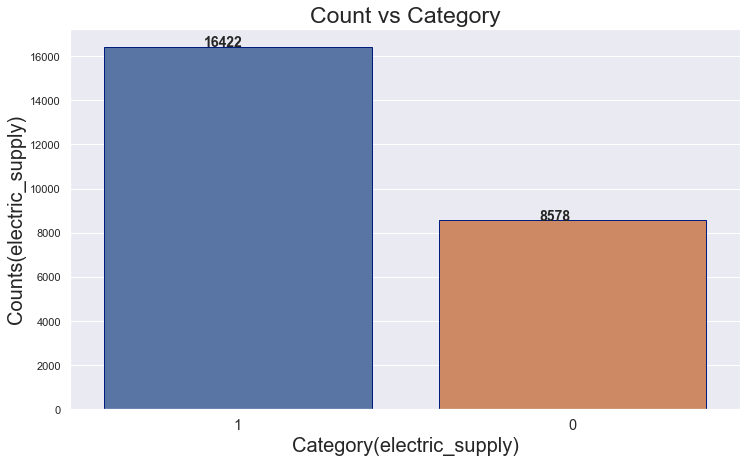



The unique categories present in the column temp_reg_mach are 0, 1 and their counts are as follows - 


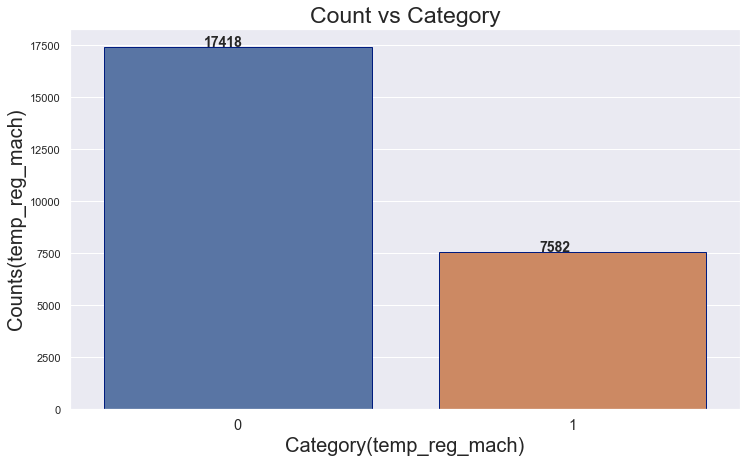



The unique categories present in the column approved_wh_govt_certificate are C, B+, B, A, A+ and their counts are as follows - 


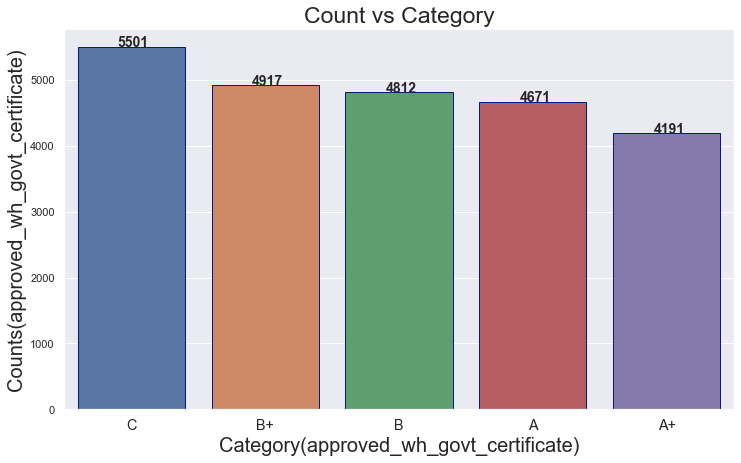

In [13]:
def plot_count(df, x_col):
    unique_cat = df[x_col].value_counts().index.tolist()
    cat_str = ", ".join(unique_cat)
    unique_cat_count = df[x_col].value_counts()
    print(f"The unique categories present in the column {x_col} are {cat_str} and their counts are as follows - ")
    plt.figure(figsize=(12, 7))
    sns.set(color_codes=True)
    ax = sns.barplot(x = unique_cat, 
                     y = unique_cat_count,
                     linewidth=1,
                     edgecolor=sns.color_palette("dark", 1))
    plt.xticks(fontweight='light',fontsize='large')
    for p in ax.patches:
        count = '{:.0f}'.format(p.get_height())
        x = p.get_x() + 0.3
        y = p.get_y() + p.get_height()
        ax.annotate(count, (x, y), size=14, weight='bold')
    plt.title('Count vs Category',
              fontdict={'fontsize': 23})
    plt.xlabel(f'Category({x_col})', fontdict={'fontsize': 20})
    plt.ylabel(f'Counts({x_col})', fontdict={'fontsize': 20})
    plt.show()
    print("\n")

for column in obj_cols:
    unique = len(df[column].value_counts().index)
    plot_count(df=df, x_col=column)

In [14]:
conv_cols = ['flood_impacted','flood_proof','electric_supply','temp_reg_mach']
df[conv_cols] = df[conv_cols].astype(int)

### b) Bivariate analysis

In [15]:
# Not considering wh_est_year for analysis
cols = df.describe().columns.tolist()
cols.remove('wh_est_year')

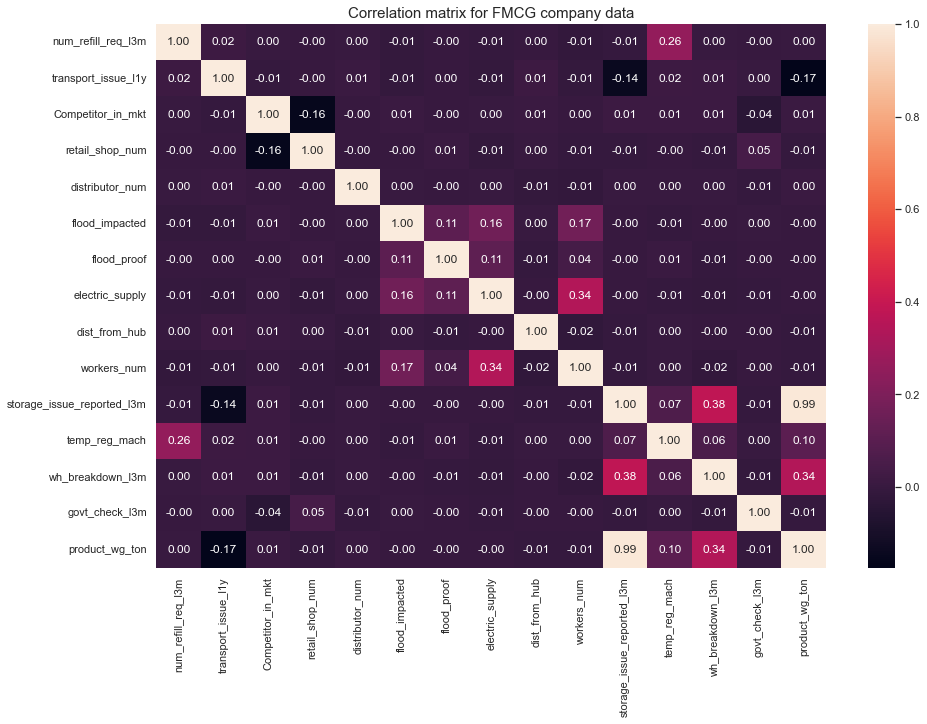

In [16]:
plt.figure(figsize = (15,10))
sns.heatmap(df[cols].corr(), annot = True, fmt=".2f")
plt.title("Correlation matrix for FMCG company data",fontdict = {'fontsize': 15})
plt.show()

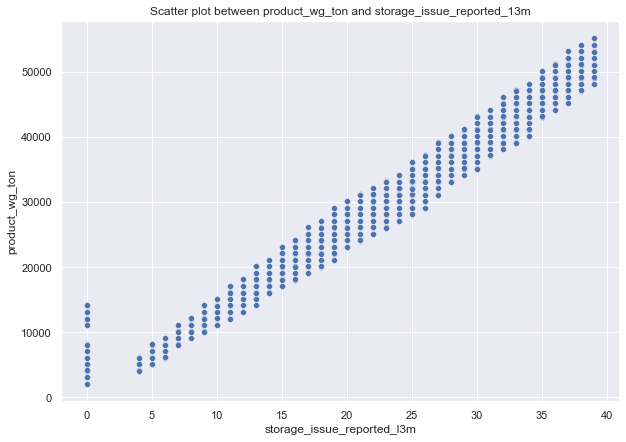

In [17]:
plt.figure(figsize=(10,7))
sns.scatterplot(x = df['storage_issue_reported_l3m'],
                y = df['product_wg_ton'])
plt.title("Scatter plot between product_wg_ton and storage_issue_reported_13m")
plt.show()

    zone  product_wg_ton
1  North       228165823
3   West       175111596
2  South       139540901
0   East         9747503


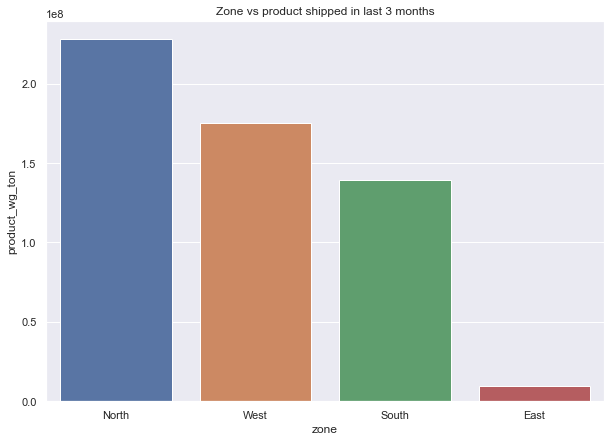

In [18]:
zone_prod_df = df.groupby('zone')['product_wg_ton'].sum().reset_index()
zone_prod_df = zone_prod_df.sort_values(by = "product_wg_ton", ascending=False)
print(zone_prod_df)
plt.figure(figsize=(10,7))
sns.barplot(x = zone_prod_df['zone'],
            y = zone_prod_df['product_wg_ton'])
plt.title("Zone vs product shipped in last 3 months")
plt.show()

  WH_regional_zone  product_wg_ton
5           Zone 6       184421651
4           Zone 5       101017613
3           Zone 4        92596029
1           Zone 2        66580768
2           Zone 3        63290230
0           Zone 1        44659532


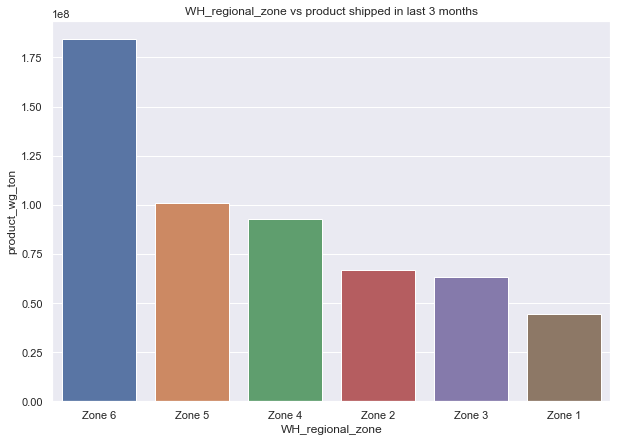

In [19]:
reg_zone_prod_df = df.groupby('WH_regional_zone')['product_wg_ton'].sum().reset_index()
reg_zone_prod_df = reg_zone_prod_df.sort_values(by = "product_wg_ton", ascending=False)
print(reg_zone_prod_df)
plt.figure(figsize=(10,7))
sns.barplot(x = reg_zone_prod_df['WH_regional_zone'],
            y = reg_zone_prod_df['product_wg_ton'])
plt.title("WH_regional_zone vs product shipped in last 3 months")
plt.show()

  Location_type  product_wg_ton
0         Rural       501482582
1         Urban        51083241


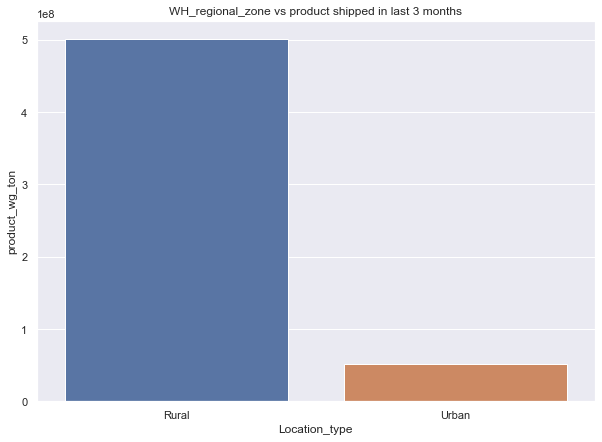

In [20]:
loc_prod_df = df.groupby('Location_type')['product_wg_ton'].sum().reset_index()
loc_prod_df = loc_prod_df.sort_values(by = "product_wg_ton", ascending=False)
print(loc_prod_df)
plt.figure(figsize=(10,7))
sns.barplot(x = loc_prod_df['Location_type'],
            y = loc_prod_df['product_wg_ton'])
plt.title("WH_regional_zone vs product shipped in last 3 months")
plt.show()

Location_type  zone   WH_regional_zone
Rural          East   Zone 1                721837
                      Zone 3               2212509
                      Zone 4               3064252
                      Zone 5               1678700
                      Zone 6               1197013
               North  Zone 1              17253467
                      Zone 2              17248175
                      Zone 3              19081593
                      Zone 4              23279730
                      Zone 5              38763182
                      Zone 6              90120806
               South  Zone 1              13562029
                      Zone 2              29952245
                      Zone 3              17178177
                      Zone 4              17438425
                      Zone 5              21920577
                      Zone 6              27789729
               West   Zone 1               9594971
                      Zone 2              1

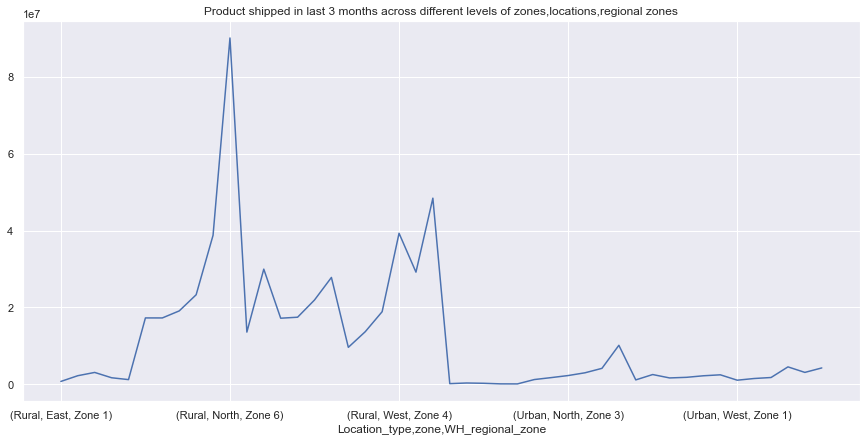

In [21]:
plt.figure(figsize = (15,7))
print(df.groupby(['Location_type','zone','WH_regional_zone'])['product_wg_ton'].sum())
df.groupby(['Location_type','zone','WH_regional_zone'])['product_wg_ton'].sum().plot()
plt.title("Product shipped in last 3 months across different levels of zones,locations,regional zones")
plt.show()

## 3. Data Cleaning and Pre-processing

#### Removal of unwanted variables (if applicable)

In [22]:
not_required_variables = ['Ware_house_ID','WH_Manager_ID','wh_est_year']
df = df.drop(not_required_variables, axis = 1)
df

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,...,1,1,91,29.0,13,0,A,5,15,17115
1,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,...,0,1,210,31.0,4,0,A,3,17,5074
2,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,...,0,0,161,37.0,17,0,A,6,22,23137
3,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,50,...,0,0,103,21.0,17,1,A+,3,27,22115
4,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,...,0,1,112,25.0,18,0,C,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,Rural,Small,North,Zone 1,3,0,4,5390,Rented,19,...,0,1,142,34.0,22,1,A,2,30,32093
24996,Rural,Mid,West,Zone 2,6,0,4,4490,Company Owned,57,...,0,1,130,28.0,10,0,B,4,18,12114
24997,Urban,Large,South,Zone 5,7,0,2,5403,Rented,31,...,0,1,147,NaN,23,0,B+,5,25,27080
24998,Rural,Small,North,Zone 1,1,0,2,10562,Rented,25,...,0,1,60,25.0,18,0,A,6,30,25093


#### Missing value treatment (if applicable)

In [23]:
null_df = df.isnull().sum()
null_df[null_df > 0]

workers_num                     990
approved_wh_govt_certificate    908
dtype: int64

In [24]:
workers_num_median = df['workers_num'].median()
print(f"The column workers_num is a numeric column and has {null_df['workers_num']} null values which is {null_df['workers_num']/df.shape[0]*100:.2f}%, it can be imputed with its median value of {workers_num_median}")
df['workers_num'] = df['workers_num'].fillna(workers_num_median)

approved_wh_govt_certificate_mode = df['approved_wh_govt_certificate'].mode()[0]
print(f"\nThe column workers_num is an object column and has {null_df['approved_wh_govt_certificate']} null values which is {null_df['approved_wh_govt_certificate']/df.shape[0]*100:.2f}%, it can be imputed with its mode value of {approved_wh_govt_certificate_mode}")
df['approved_wh_govt_certificate'] = df['approved_wh_govt_certificate'].fillna(approved_wh_govt_certificate_mode)

The column workers_num is a numeric column and has 990 null values which is 3.96%, it can be imputed with its median value of 28.0

The column workers_num is an object column and has 908 null values which is 3.63%, it can be imputed with its mode value of C


In [25]:
null_df = df.isnull().sum()
null_df[null_df > 0]

Series([], dtype: int64)

#### Outlier treatment (if required)

In [26]:
def five_point_summary(col):
    sorted(col)
    Q1,Q2,Q3=np.quantile(col,[.25,.50,.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range, Q1, Q2, Q3

def outlier_proportions(df):
    outlier_prop_df = pd.DataFrame(columns = ["LL","Q1","Q2","Q3","UL","no_of_outliers","Outliers(%)","Outliers"])
    num_cols = df.describe().columns
    for col in num_cols:
        lr,ur,Q1,Q2,Q3 = five_point_summary(df[col])
#         print(f"\nThe five point summary of the column {col} : \n\nlower limit = {lr}, upper limit = {ur}, Q1 = {Q1}, Q2 = {Q2}, Q3 = {Q3}")
        temp_df = df.loc[(df[col]<lr) | (df[col]>ur)]
#         print(f"Outliers proportion : {len(temp_df)/len(df)*100}%, Number of outliers = {len(temp_df)}")
        outlier_prop_df.loc[outlier_prop_df.shape[0]] = [lr,Q1,Q2,Q3,ur,len(temp_df),len(temp_df)/len(df)*100,temp_df[col].values]
    outlier_prop_df.index = num_cols
    return outlier_prop_df

In [27]:
## Not considering the numeric columns that are of categorical in nature
conv_cols = ['flood_impacted','flood_proof','electric_supply','temp_reg_mach']
df[conv_cols] = df[conv_cols].astype(str)
outlier_prop_df = outlier_proportions(df)
outlier_prop_df

,LL,Q1,Q2,Q3,UL,no_of_outliers,Outliers(%),Outliers
num_refill_req_l3m,-4.0,2.0,4.0,6.0,12.0,0,0.000,[]
transport_issue_l1y,-1.5,0.0,0.0,1.0,2.5,2943,11.772,"[4, 3, 3, 3, 4, 5, 3, 3, 3, 3, 3, 5, 4, 3, 3, ..."
Competitor_in_mkt,-1.0,2.0,3.0,4.0,7.0,96,0.384,"[8, 8, 10, 8, 8, 8, 9, 8, 10, 8, 9, 12, 8, 8, ..."
retail_shop_num,2532.5,4313.0,4859.0,5500.0,7280.5,948,3.792,"[7692, 7311, 8913, 8736, 8137, 7896, 8236, 805..."
distributor_num,-11.5,29.0,42.0,56.0,96.5,0,0.000,[]
dist_from_hub,-54.5,109.0,164.0,218.0,381.5,0,0.000,[]
workers_num,10.5,24.0,28.0,33.0,46.5,607,2.428,"[47.0, 48.0, 50.0, 62.0, 49.0, 49.0, 56.0, 53...."
storage_issue_reported_l3m,-11.0,10.0,18.0,24.0,45.0,0,0.000,[]
wh_breakdown_l3m,-2.5,2.0,3.0,5.0,9.5,0,0.000,[]
govt_check_l3m,-11.5,11.0,21.0,26.0,48.5,0,0.000,[]


#### Encoding of Object columns

In [28]:
obj_cols = df.select_dtypes(include=['object', 'bool']).columns.tolist()
label_encod_cols = ['zone','WH_regional_zone','approved_wh_govt_certificate']
onehot_encod_cols = ['Location_type','wh_owner_type','flood_impacted','flood_proof','electric_supply','temp_reg_mach']
ordinal_cols = ['WH_capacity_size']
WH_capacity_size = {"Small" : 1, "Mid" : 2, "Large" : 3}

df['WH_capacity_size'] = df['WH_capacity_size'].replace(WH_capacity_size) 
df = pd.get_dummies(df, columns = onehot_encod_cols, drop_first=True)
for col in label_encod_cols:
    df[col] = pd.Categorical(df[col]).codes
df

,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,dist_from_hub,workers_num,...,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,Location_type_Urban,wh_owner_type_Rented,flood_impacted_1,flood_proof_1,electric_supply_1,temp_reg_mach_1
0,1,3,5,3,1,2,4651,24,91,29.0,...,0,5,15,17115,1,1,0,1,1,0
1,3,1,4,0,0,4,6217,47,210,31.0,...,0,3,17,5074,0,0,0,0,1,0
2,2,2,1,1,0,4,4306,64,161,37.0,...,0,6,22,23137,0,0,0,0,0,0
3,2,1,2,7,4,2,6000,50,103,21.0,...,1,3,27,22115,0,1,0,0,0,1
4,3,1,4,3,1,2,4740,42,112,25.0,...,4,6,24,24071,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,1,1,0,3,0,4,5390,19,142,34.0,...,0,2,30,32093,0,1,0,0,1,1
24996,2,3,1,6,0,4,4490,57,130,28.0,...,2,4,18,12114,0,0,0,0,1,0
24997,3,2,4,7,0,2,5403,31,147,28.0,...,3,5,25,27080,1,1,1,0,1,0
24998,1,1,0,1,0,2,10562,25,60,25.0,...,0,6,30,25093,0,1,0,0,1,0


#### Split into features and target variable

In [29]:
X = df.drop("product_wg_ton",axis = 1)
y = df[['product_wg_ton']]

#### Split the data into train and test data

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)
print(f"The shape of X_train : {X_train.shape}")
print(f"The shape of X_test : {X_test.shape}")
print(f"The shape of y_train : {y_train.shape}")
print(f"The shape of y_test : {y_test.shape}")

The shape of X_train : (17500, 20)
The shape of X_test : (7500, 20)
The shape of y_train : (17500, 1)
The shape of y_test : (7500, 1)


#### Scaling the data

In [31]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
X_train = pd.DataFrame(norm.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(norm.transform(X_test), columns=X_test.columns)

## 4. Model Building

In [53]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

def adj_r2(r2,n,k):
    res = 1 - (1-r2)*((n-1)/(n-k-1))
    return res

def validation(model,X_test,y_test):
    #Predictions
    y_pred_test = model.predict(X_test)
    #MAE
    mae_test = mean_absolute_error(y_test,y_pred_test)
    print(f"\nThe Mean Absolute Error (MAE) of the model for Test set is {mae_test}")
    
    #RMSE
    rmse_test = np.sqrt(mean_squared_error(y_test,y_pred_test))
    print(f"\nThe Root Mean Square Error (RMSE) of the model for Test set is {rmse_test}")
    
    #MAPE
    mape_test = mean_absolute_percentage_error(y_test,y_pred_test)
    print(f"\nThe Mean Absolute Percentage Error (MAPE) of the model for Test set is {mape_test*100:.2f}%")
    
    #R^2 values
    r2_test = model.score(X_test, y_test)
    print('\nThe coefficient of determination R^2 of the prediction on Test set',r2_test)
    
    #Adjusted R^2
    print(f"\nThe Adjusted R^2 for Test set is {adj_r2(r2_test,n=X_test.shape[0],k=X_test.shape[1])}")
    

def model(model,X_train,y_train, fit = True):
    #Fit the model
    if fit:
        model.fit(X_train, y_train)

    #Predictions
    y_pred_train = model.predict(X_train)
    
    #MAE
    mae_train = mean_absolute_error(y_train,y_pred_train)
    print(f"\nThe Mean Absolute Error (MAE) of the model for Train set is {mae_train}")
    
    #RMSE
    rmse_train = np.sqrt(mean_squared_error(y_train,y_pred_train))
    print(f"\nThe Root Mean Square Error (RMSE) of the model for Train set is {rmse_train}")
    
    #MAPE
    mape_train = mean_absolute_percentage_error(y_train,y_pred_train)
    print(f"\nThe Mean Absolute Percentage Error (MAPE) of the model for Train set is {mape_train*100:.2f}%")
    
    #R^2 value
    r2_train = model.score(X_train, y_train)
    print('\nThe coefficient of determination R^2 of the prediction on Train set',r2_train)
    
    #Adjusted R^2 value
    print(f"\nThe Adjusted R^2 for Train set is {adj_r2(r2_train,n=X_train.shape[0],k=X_train.shape[1])}")
    
    return model

#### Model 1 - Linear Regression Base model (sklearn)

In [33]:
from sklearn.linear_model import LinearRegression
LR_base = LinearRegression()
LR_base_fitted = model(LR_base,X_train,y_train)
model1 = LR_base_fitted
print()
#Coefficients
for i, col in enumerate(X_train.columns):
    print(f"The coefficient for {col} is {LR_base_fitted.coef_[0][i]}")
#Intercept  
intercept = LR_base_fitted.intercept_[0]
print(f"\nThe intercept for the model is {intercept}")


The Mean Absolute Error (MAE) of the model for Train set is 1294.5243727069453

The Root Mean Square Error (RMSE) of the model for Train set is 1771.8361446282172

The Mean Absolute Percentage Error (MAPE) of the model for Train set is 9.01%

The coefficient of determination R^2 of the prediction on Train set 0.9768484609882184

The Adjusted R^2 for Train set is 0.976821970297662

The coefficient for WH_capacity_size is -21.935480598392978
The coefficient for zone is -11.410633823054884
The coefficient for WH_regional_zone is -35.32693907291931
The coefficient for num_refill_req_l3m is -20.102488292155446
The coefficient for transport_issue_l1y is -1553.4577572276787
The coefficient for Competitor_in_mkt is -92.32759453133453
The coefficient for retail_shop_num is -110.95827876459073
The coefficient for distributor_num is 64.82054843959068
The coefficient for dist_from_hub is 56.823481604329764
The coefficient for workers_num is -19.919064040399206
The coefficient for storage_issue_re

#### Apply Variance inflation factor and build the model

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df.drop("product_wg_ton",axis = 1)
y = df[['product_wg_ton']]

def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [36]:
temp_df = calc_vif(X).sort_values(by = 'VIF', ascending = False)
temp_df

,variables,VIF
6,retail_shop_num,17.242065
9,workers_num,14.913042
0,WH_capacity_size,13.098419
5,Competitor_in_mkt,7.893828
7,distributor_num,7.404735
8,dist_from_hub,7.261427
2,WH_regional_zone,6.653831
13,govt_check_l3m,6.178296
12,wh_breakdown_l3m,6.054492
1,zone,5.489183


In [37]:
X = X.drop('retail_shop_num', axis = 1)
temp_df = calc_vif(X).sort_values(by = 'VIF', ascending = False)
temp_df

,variables,VIF
8,workers_num,13.941938
0,WH_capacity_size,13.067861
5,Competitor_in_mkt,7.889259
6,distributor_num,7.170903
7,dist_from_hub,7.033047
2,WH_regional_zone,6.598429
11,wh_breakdown_l3m,5.995173
12,govt_check_l3m,5.915943
1,zone,5.388356
9,storage_issue_reported_l3m,5.331288


In [38]:
X = X.drop('workers_num', axis = 1)
temp_df = calc_vif(X).sort_values(by = 'VIF', ascending = False)
temp_df

,variables,VIF
0,WH_capacity_size,12.922854
5,Competitor_in_mkt,7.726410
6,distributor_num,7.014665
7,dist_from_hub,6.892393
2,WH_regional_zone,6.565151
10,wh_breakdown_l3m,5.954896
11,govt_check_l3m,5.772588
8,storage_issue_reported_l3m,5.286663
1,zone,5.263941
3,num_refill_req_l3m,3.600609


In [39]:
X = X.drop('WH_capacity_size', axis = 1)
temp_df = calc_vif(X).sort_values(by = 'VIF', ascending = False)
temp_df

,variables,VIF
4,Competitor_in_mkt,7.700732
5,distributor_num,6.949825
6,dist_from_hub,6.835556
9,wh_breakdown_l3m,5.936941
7,storage_issue_reported_l3m,5.270383
0,zone,5.232907
10,govt_check_l3m,5.079044
1,WH_regional_zone,4.432733
2,num_refill_req_l3m,3.591493
8,approved_wh_govt_certificate,3.161849


In [40]:
X = X.drop('Competitor_in_mkt', axis = 1)
temp_df = calc_vif(X).sort_values(by = 'VIF', ascending = False)
temp_df

,variables,VIF
4,distributor_num,6.837815
5,dist_from_hub,6.710278
8,wh_breakdown_l3m,5.898362
6,storage_issue_reported_l3m,5.237882
9,govt_check_l3m,4.979169
0,zone,4.850827
1,WH_regional_zone,4.324989
2,num_refill_req_l3m,3.576738
7,approved_wh_govt_certificate,3.133644
14,electric_supply_1,3.010437


In [41]:
X = X.drop('distributor_num', axis = 1)
temp_df = calc_vif(X).sort_values(by = 'VIF', ascending = False)
temp_df

,variables,VIF
4,dist_from_hub,6.557936
7,wh_breakdown_l3m,5.843704
5,storage_issue_reported_l3m,5.186722
8,govt_check_l3m,4.805072
0,zone,4.688465
1,WH_regional_zone,4.224218
2,num_refill_req_l3m,3.550217
6,approved_wh_govt_certificate,3.085465
13,electric_supply_1,2.982268
10,wh_owner_type_Rented,1.886735


In [42]:
X = X.drop('dist_from_hub', axis = 1)
temp_df = calc_vif(X).sort_values(by = 'VIF', ascending = False)
temp_df

,variables,VIF
6,wh_breakdown_l3m,5.774181
4,storage_issue_reported_l3m,5.127577
7,govt_check_l3m,4.551563
0,zone,4.465744
1,WH_regional_zone,4.080274
2,num_refill_req_l3m,3.517791
5,approved_wh_govt_certificate,3.023954
12,electric_supply_1,2.947933
9,wh_owner_type_Rented,1.874554
13,temp_reg_mach_1,1.576417


In [43]:
X = X.drop('wh_breakdown_l3m', axis = 1)
temp_df = calc_vif(X).sort_values(by = 'VIF', ascending = False)
temp_df

,variables,VIF
6,govt_check_l3m,4.449293
0,zone,4.348712
4,storage_issue_reported_l3m,4.020708
1,WH_regional_zone,4.018752
2,num_refill_req_l3m,3.504569
5,approved_wh_govt_certificate,3.023953
11,electric_supply_1,2.933680
8,wh_owner_type_Rented,1.865779
12,temp_reg_mach_1,1.574156
3,transport_issue_l1y,1.407211


In [44]:
print(f"Hence the columns selected for developing the regression models are: \n\n{list(temp_df['variables'].values)}")

Hence the columns selected for developing the regression models are: 

['govt_check_l3m', 'zone', 'storage_issue_reported_l3m', 'WH_regional_zone', 'num_refill_req_l3m', 'approved_wh_govt_certificate', 'electric_supply_1', 'wh_owner_type_Rented', 'temp_reg_mach_1', 'transport_issue_l1y', 'flood_impacted_1', 'Location_type_Urban', 'flood_proof_1']


#### Model 2 - Linear Regression model after VIF treatment

In [45]:
from sklearn.model_selection import train_test_split

X_train_vif, X_test_vif, y_train_vif, y_test_vif = train_test_split(X, y, test_size=0.30 , random_state=1)
print(f"The shape of X_train : {X_train_vif.shape}")
print(f"The shape of X_test : {X_test_vif.shape}")
print(f"The shape of y_train : {y_train_vif.shape}")
print(f"The shape of y_test : {y_test_vif.shape}")

from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
X_train_vif = pd.DataFrame(norm.fit_transform(X_train_vif), columns=X_train_vif.columns)
X_test_vif = pd.DataFrame(norm.transform(X_test_vif), columns=X_test_vif.columns)

from sklearn.linear_model import LinearRegression
LR_base_VIF = LinearRegression()
LR_base_fitted_VIF = model(LR_base_VIF,X_train_vif,y_train_vif)
model2 = LR_base_fitted_VIF
print()
#Coefficients
for i, col in enumerate(X_train_vif.columns):
    print(f"The coefficient for {col} is {LR_base_fitted_VIF.coef_[0][i]}")
#Intercept  
intercept = LR_base_fitted_VIF.intercept_[0]
print(f"\nThe intercept for the model is {intercept}")

The shape of X_train : (17500, 13)
The shape of X_test : (7500, 13)
The shape of y_train : (17500, 1)
The shape of y_test : (7500, 1)

The Mean Absolute Error (MAE) of the model for Train set is 1300.4203511593867

The Root Mean Square Error (RMSE) of the model for Train set is 1812.4455354994773

The Mean Absolute Percentage Error (MAPE) of the model for Train set is 9.24%

The coefficient of determination R^2 of the prediction on Train set 0.9757750615581746

The Adjusted R^2 for Train set is 0.9757570514815566

The coefficient for zone is -26.002521879819017
The coefficient for WH_regional_zone is -46.60380336997041
The coefficient for num_refill_req_l3m is -15.820661226274137
The coefficient for transport_issue_l1y is -1650.1457547265816
The coefficient for storage_issue_reported_l3m is 48311.93909754236
The coefficient for approved_wh_govt_certificate is -313.1306304571404
The coefficient for govt_check_l3m is 0.2672098694038823
The coefficient for Location_type_Urban is -134.2534

#### Model 3 - Ensemble modeling with RandomForestRegressor

In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Performing RandomForestRegressor
X = df.drop("product_wg_ton",axis = 1)
y = df[['product_wg_ton']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)
print(f"The shape of X_train : {X_train.shape}")
print(f"The shape of X_test : {X_test.shape}")
print(f"The shape of y_train : {y_train.shape}")
print(f"The shape of y_test : {y_test.shape}")

rf_regressor = RandomForestRegressor()
rf_regressor_model = model(rf_regressor,X_train,y_train)
model3 = rf_regressor_model

The shape of X_train : (17500, 20)
The shape of X_test : (7500, 20)
The shape of y_train : (17500, 1)
The shape of y_test : (7500, 1)

The Mean Absolute Error (MAE) of the model for Train set is 265.17008628571426

The Root Mean Square Error (RMSE) of the model for Train set is 363.0044548443449

The Mean Absolute Percentage Error (MAPE) of the model for Train set is 1.71%

The coefficient of determination R^2 of the prediction on Train set 0.9990282452723248

The Adjusted R^2 for Train set is 0.9990271333611999


#### Model 4 - Ensemble modeling with RandomForestRegressor and GridSearchCV

In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [20],
#     'criterion' : ['squared_error', 'absolute_error', 'poisson'],
#     'max_depth': [3, 5],
#     'min_samples_leaf': [4,6],
}

rf_regressor = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf_regressor, param_grid = param_grid, cv = 5)
grid_search.fit(X_train, y_train)

print(f"\nThe best parameters are {grid_search.best_params_}")
print(f"\nThe best estimator is : {grid_search.best_estimator_}")
print(f"\nBest estimator's score on training data is {grid_search.best_estimator_.score(X_train,y_train)*100:.2f}%")
model4 = grid_search.best_estimator_
# print(f"\nBest estimator's score on testing data is {grid_search.best_estimator_.score(X_test,y_test)*100:.2f}%")
model(model4, X_train, y_train, fit = False)


The best parameters are {'n_estimators': 20}

The best estimator is : RandomForestRegressor(n_estimators=20)

Best estimator's score on training data is 99.89%

The Mean Absolute Error (MAE) of the model for Train set is 275.93964

The Root Mean Square Error (RMSE) of the model for Train set is 390.77939478212727

The Mean Absolute Percentage Error (MAPE) of the model for Train set is 1.79%

The coefficient of determination R^2 of the prediction on Train set 0.9988738504581226

The Adjusted R^2 for Train set is 0.9988725618837856


RandomForestRegressor(n_estimators=20)

#### Model 5 - Ensemble modeling with RandomForestRegressor and GridSearchCV

In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [20],
    'criterion' : ['squared_error', 'absolute_error'],
#     'max_depth': [3, 5],
#     'min_samples_leaf': [4,6],
}

rf_regressor = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf_regressor, param_grid = param_grid, cv = 5)
grid_search.fit(X_train, y_train)

print(f"\nThe best parameters are {grid_search.best_params_}")
print(f"\nThe best estimator is : {grid_search.best_estimator_}")
print(f"\nBest estimator's score on training data is {grid_search.best_estimator_.score(X_train,y_train)*100:.2f}%")
model5 = grid_search.best_estimator_
# print(f"\nBest estimator's score on testing data is {grid_search.best_estimator_.score(X_test,y_test)*100:.2f}%")
model(model5, X_train, y_train, fit = False)


The best parameters are {'criterion': 'squared_error', 'n_estimators': 20}

The best estimator is : RandomForestRegressor(n_estimators=20)

Best estimator's score on training data is 99.89%

The Mean Absolute Error (MAE) of the model for Train set is 276.38111142857144

The Root Mean Square Error (RMSE) of the model for Train set is 391.0846052452808

The Mean Absolute Percentage Error (MAPE) of the model for Train set is 1.78%

The coefficient of determination R^2 of the prediction on Train set 0.998872090657822

The Adjusted R^2 for Train set is 0.9988708000698683


RandomForestRegressor(n_estimators=20)

#### Model 6 - Ensemble modeling with RandomForestRegressor and GridSearchCV

In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [20],
    'criterion' : ['squared_error'],
    'max_depth': [3, 5, 7],
#     'min_samples_leaf': [4,6],
}

rf_regressor = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf_regressor, param_grid = param_grid, cv = 5)
grid_search.fit(X_train, y_train)

print(f"\nThe best parameters are {grid_search.best_params_}")
print(f"\nThe best estimator is : {grid_search.best_estimator_}")
print(f"\nBest estimator's score on training data is {grid_search.best_estimator_.score(X_train,y_train)*100:.2f}%")
model6 = grid_search.best_estimator_
# print(f"\nBest estimator's score on testing data is {grid_search.best_estimator_.score(X_test,y_test)*100:.2f}%")
model(model6, X_train, y_train)


The best parameters are {'criterion': 'squared_error', 'max_depth': 7, 'n_estimators': 20}

The best estimator is : RandomForestRegressor(max_depth=7, n_estimators=20)

Best estimator's score on training data is 99.23%

The Mean Absolute Error (MAE) of the model for Train set is 751.2900465225732

The Root Mean Square Error (RMSE) of the model for Train set is 1020.1866484600336

The Mean Absolute Percentage Error (MAPE) of the model for Train set is 4.75%

The coefficient of determination R^2 of the prediction on Train set 0.9923247589562991

The Adjusted R^2 for Train set is 0.9923159767135579


RandomForestRegressor(max_depth=7, n_estimators=20)

#### Model 7 - Ensemble modeling with RandomForestRegressor and GridSearchCV

In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50],
    'criterion' : ['squared_error'],
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [4,6],
}

rf_regressor = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf_regressor, param_grid = param_grid, cv = 5)
grid_search.fit(X_train, y_train)


print(f"\nThe best parameters are {grid_search.best_params_}")
print(f"\nThe best estimator is : {grid_search.best_estimator_}")
print(f"\nBest estimator's score on training data is {grid_search.best_estimator_.score(X_train,y_train)*100:.2f}%")
# print(f"\nBest estimator's score on testing data is {grid_search.best_estimator_.score(X_test,y_test)*100:.2f}%")
model7 = grid_search.best_estimator_
model(model7, X_train, y_train)


The best parameters are {'criterion': 'squared_error', 'max_depth': 7, 'min_samples_leaf': 4, 'n_estimators': 50}

The best estimator is : RandomForestRegressor(max_depth=7, min_samples_leaf=4, n_estimators=50)

Best estimator's score on training data is 99.23%

The Mean Absolute Error (MAE) of the model for Train set is 751.0659613926209

The Root Mean Square Error (RMSE) of the model for Train set is 1020.2698368667437

The Mean Absolute Percentage Error (MAPE) of the model for Train set is 4.74%

The coefficient of determination R^2 of the prediction on Train set 0.9923235071910335

The Adjusted R^2 for Train set is 0.9923147235159846


RandomForestRegressor(max_depth=7, min_samples_leaf=4, n_estimators=50)

### Optimum model

In [66]:
best_model = model7
validation(best_model, X_test, y_test)


The Mean Absolute Error (MAE) of the model for Test set is 744.6886785939761

The Root Mean Square Error (RMSE) of the model for Test set is 988.9120095677337

The Mean Absolute Percentage Error (MAPE) of the model for Test set is 4.63%

The coefficient of determination R^2 of the prediction on Test set 0.9926306434001184

The Adjusted R^2 for Test set is 0.9926109366034882


### Feature Importance of the best model

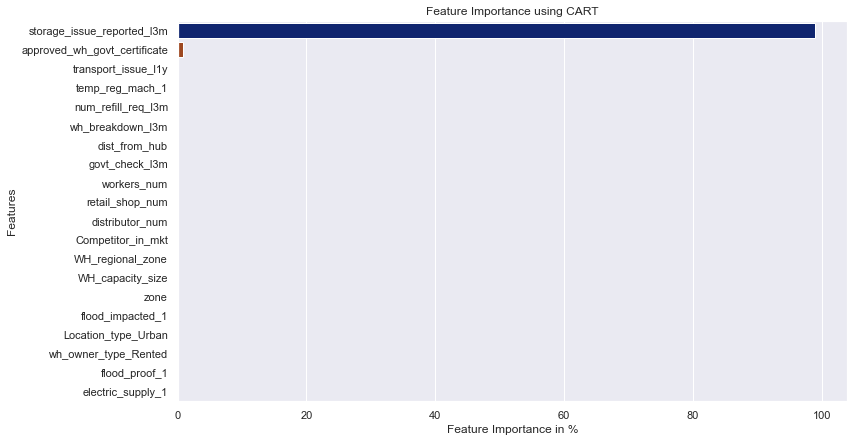

In [67]:
x=pd.DataFrame(best_model.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='dark')
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance using CART')
plt.show()

## 5. Model Validation

### Model 1

In [34]:
validation(model1, X_test, y_test)


The Mean Absolute Error (MAE) of the model for Test set is 1275.0808234962778

The Root Mean Square Error (RMSE) of the model for Test set is 1711.5804472171883

The Mean Absolute Percentage Error (MAPE) of the model for Test set is 8.84%

The coefficient of determination R^2 of the prediction on Test set 0.9779245836515131

The Adjusted R^2 for Test set is 0.9778655505819892


### Model 2

In [47]:
validation(model2, X_test_vif, y_test_vif)


The Mean Absolute Error (MAE) of the model for Test set is 1276.104174643809

The Root Mean Square Error (RMSE) of the model for Test set is 1744.02384993421

The Mean Absolute Percentage Error (MAPE) of the model for Test set is 9.08%

The coefficient of determination R^2 of the prediction on Test set 0.9770797627054585

The Adjusted R^2 for Test set is 0.9770399599957565


### Model 3

In [49]:
validation(model3, X_test, y_test)


The Mean Absolute Error (MAE) of the model for Test set is 701.9361093333332

The Root Mean Square Error (RMSE) of the model for Test set is 940.0584865458106

The Mean Absolute Percentage Error (MAPE) of the model for Test set is 4.55%

The coefficient of determination R^2 of the prediction on Test set 0.9933407699385448

The Adjusted R^2 for Test set is 0.9933229621298499


### Model 4

In [57]:
validation(model4, X_test, y_test)


The Mean Absolute Error (MAE) of the model for Test set is 713.2514733333334

The Root Mean Square Error (RMSE) of the model for Test set is 959.907599151953

The Mean Absolute Percentage Error (MAPE) of the model for Test set is 4.62%

The coefficient of determination R^2 of the prediction on Test set 0.9930565848969612

The Adjusted R^2 for Test set is 0.9930380171336157


### Model 5

In [61]:
validation(model5, X_test, y_test)


The Mean Absolute Error (MAE) of the model for Test set is 716.34844

The Root Mean Square Error (RMSE) of the model for Test set is 959.5212752277391

The Mean Absolute Percentage Error (MAPE) of the model for Test set is 4.64%

The coefficient of determination R^2 of the prediction on Test set 0.9930621726589338

The Adjusted R^2 for Test set is 0.9930436198381261


### Model 6

In [62]:
validation(model6, X_test, y_test)


The Mean Absolute Error (MAE) of the model for Test set is 745.279583116128

The Root Mean Square Error (RMSE) of the model for Test set is 989.7503843985943

The Mean Absolute Percentage Error (MAPE) of the model for Test set is 4.65%

The coefficient of determination R^2 of the prediction on Test set 0.9926181429917302

The Adjusted R^2 for Test set is 0.9925984027670791


### Model 7

In [63]:
validation(model7, X_test, y_test)


The Mean Absolute Error (MAE) of the model for Test set is 744.6886785939761

The Root Mean Square Error (RMSE) of the model for Test set is 988.9120095677337

The Mean Absolute Percentage Error (MAPE) of the model for Test set is 4.63%

The coefficient of determination R^2 of the prediction on Test set 0.9926306434001184

The Adjusted R^2 for Test set is 0.9926109366034882


## 6. Final interpretation / recommendation

### Interpretations

•	The columns WH_capacity_size, zone, WH_regional_zone, num_refill_req_l3m, transport_sue_l1y, Competitor_in_mkt, retail_shop_num, workers_num, approved_wh_govt_certificate, wh_breakdown_l3m, govt_check_l3m, Location_type_Urban  have a negative linear relationship with the target variable produc_wg_ton.

•	The columns storage_issue_reported_l3m, wh_owner_type_Rented, flood_impacted_1, flood_proof_1, electric_supply_1, temp_reg_mach_1, dtributor_num, dt_from_hub  have a positive linear relationship with the target variable product_wg_ton.

•	The model has a good R^2 and adjusted R^2 score close to 1, which would indicate that the model can be used to predict the optimal product_wg_ton to be shipped.

•	Of the columns that have negative linear relation with the target variable the columns transport_sue_l1y, wh_breakdown_l3m, approved_wh_govt_certificate have higher magnitude which would indicate that if there are any transport issues or warehouse break downs the shipment has a problem. And also, the approved govt certificate matters for the shipment.

•	 Of the columns that have positive linear relation with the target variable the columns storage_issue_reported_l3m, temp_reg_mach_1 have higher magnitude which would indicate that the warehouses that reported storage issues more the shipment was smooth.


•	Once the VIF treatment is performed some features are discarded and the following columns 
govt_check_l3m, zone, WH_regional_zone, storage_issue_reported_l3m, num_refill_req_l3m, approved_wh_govt_certificate, electric_supply_1, wh_owner_type_Rented, temp_reg_mach_1, transport_issue_l1y, flood_impacted_1, Location_type_Urban, flood_proof_1
are considered for the optimal value to be shipped.

•	The sum of product shipped seems to be low in Urban areas when compared to rural areas.

•	The Rural, North, Zone 6 have the highest sum of product shipped.

•	The Urban, East and Zone 1 have the least sum of product shipped.


### Recommendations

•	As the regression models have identified if there are any transport issues or warehouse breakdowns the shipment has some effect in those areas.

•	Hence, if suppose the company plans to ship its shipment it should check the areas where there are transport issues or ware house breakdowns and avoid sending the shipment to those areas. 

•	And also, the company needs to take appropriate measures to avoid any transport issues and warehouse break downs in those areas.

•	The Random Forest model has identified that the areas where the storage issues are reported has some relation with the shipment, the company can identify such areas and take necessary measures such as contact the management at the warehouses and identify the reason for the issues, to avoid such storage issues.

•	The Random Forest model has also identified that the approved govt certificate has some relation with the shipment, the company can identify such areas and take the necessary measures like upgrading the certificate of ware houses to next higher level so that it doesn’t affect the shipment.

•	As the models have identified some areas where the shipment is affected and the reasons for it, the company can make advertisement campaigns in the areas where there are no storage issues, transport issue or warehouse break downs so that the company can gain profits.

•	The Urban, East and Zone 1 have the least sum of product shipped. Hence the management needs to identify the reasons for that take necessary measures such as providing offers such as “buy 2 get 1 free” and discounts such as 50% or 60%.
